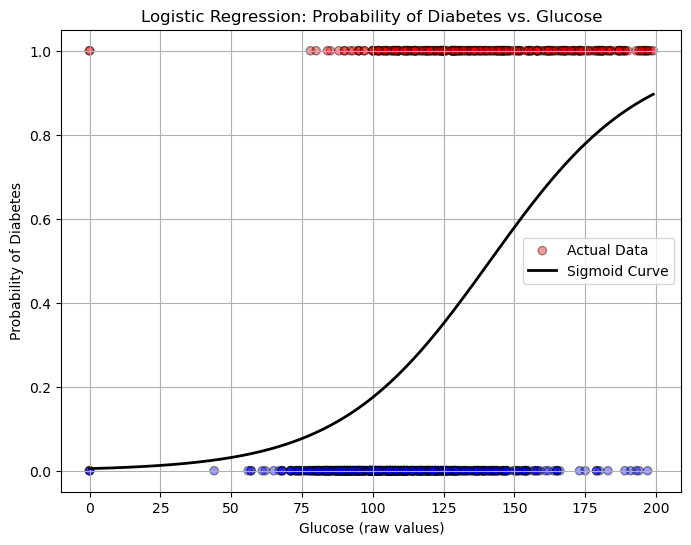

Glucose Level: 150
Predicted Probability of Diabetes: 0.58
Prediction: Has Diabetes


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
columns = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", 
           "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]
df = pd.read_csv(url, header=None, names=columns)

X = df[["Glucose"]].values
y = df["Outcome"].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
model = LogisticRegression()
model.fit(X_scaled, y)

glucose_range_raw = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)
glucose_range_scaled = scaler.transform(glucose_range_raw)
probs = model.predict_proba(glucose_range_scaled)[:, 1]

plt.figure(figsize=(8, 6))
plt.scatter(X, y, alpha=0.4, label="Actual Data", c=y, cmap="bwr", edgecolor='k')
plt.plot(glucose_range_raw, probs, color="black", linewidth=2, label="Sigmoid Curve")
plt.xlabel("Glucose (raw values)")
plt.ylabel("Probability of Diabetes")
plt.title("Logistic Regression: Probability of Diabetes vs. Glucose")
plt.legend()
plt.grid(True)
plt.show()

####################################################################
# this part puts a new patient with new glucose levels             #
# based on previous data to see whether they have diabetes or not  #
####################################################################

new_glucose_raw = np.array([[150]])
new_glucose_scaled = scaler.transform(new_glucose_raw)
probability = model.predict_proba(new_glucose_scaled)[0][1]  # probability of class 1 (has diabetes)
prediction = model.predict(new_glucose_scaled)[0]

print(f"Glucose Level: {new_glucose_raw[0][0]}")
print(f"Predicted Probability of Diabetes: {probability:.2f}")
print(f"Prediction: {'Has Diabetes' if prediction == 1 else 'No Diabetes'}")

